In [46]:
import tsai
from tsai.all import *
print('tsai       :', tsai.__version__)
print('fastai     :', fastai.__version__)
print('fastcore   :', fastcore.__version__)
print('torch      :', torch.__version__)

tsai       : 0.2.15
fastai     : 2.2.7
fastcore   : 1.3.19
torch      : 1.7.1


In [47]:
import pandas as pd
import numpy 
import sys, os 

In [48]:
all_data = pd.read_csv('/home/msms-dl/Data_repository/data_set_for_time_series_modelling.csv')

In [49]:
all_data

,variable,sample_num,y_list,0,1,2,3,4,5,6,...,140,141,142,143,144,145,146,147,148,149
0,0,0,0,0.224494,0.206774,0.186787,0.165137,0.142494,0.120503,0.099685,...,0.464327,0.467588,0.463362,0.451985,0.433873,0.409519,0.379924,0.346681,0.310992,0.272718
1,1,0,0,0.364835,0.352226,0.337114,0.319422,0.299314,0.277119,0.253468,...,0.358533,0.386740,0.413994,0.439201,0.461412,0.480089,0.494348,0.503040,0.505823,0.503370
2,2,0,0,0.520462,0.482965,0.440572,0.394515,0.345786,0.294474,0.241621,...,0.289950,0.327996,0.363594,0.396840,0.427912,0.456200,0.481520,0.504057,0.523828,0.539598
3,3,0,0,0.783266,0.759031,0.730284,0.697630,0.662003,0.625092,0.587849,...,0.489470,0.519163,0.542995,0.559830,0.568507,0.568698,0.560052,0.542068,0.514457,0.478396
4,4,0,0,0.645734,0.602404,0.555950,0.508092,0.460838,0.416180,0.376285,...,0.753820,0.757564,0.755756,0.748798,0.737368,0.721707,0.702481,0.680725,0.657292,0.632572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67195,95,671,0,0.521814,0.521961,0.520078,0.516298,0.511220,0.505161,0.498108,...,0.174364,0.168847,0.161007,0.150910,0.138703,0.125436,0.112630,0.102250,0.096530,0.097081
67196,96,671,0,0.240470,0.261896,0.280877,0.296437,0.307578,0.313873,0.315439,...,0.091951,0.115503,0.138765,0.161836,0.184868,0.207500,0.229045,0.248849,0.266542,0.281786
67197,97,671,0,0.252532,0.252799,0.252251,0.250172,0.246348,0.240922,0.234007,...,0.203210,0.224479,0.246617,0.268696,0.289611,0.308182,0.324270,0.337763,0.348133,0.355272
67198,98,671,0,0.272753,0.258071,0.241860,0.225063,0.208114,0.191699,0.176989,...,0.291830,0.313320,0.332675,0.349313,0.362869,0.373462,0.380510,0.383555,0.382708,0.377765


In [50]:
X, y = df2xy(all_data, feat_col='variable', target_col=all_data.columns[2], data_cols=all_data.columns[3:])
X.shape, y.shape

((672, 100, 150), (672,))

In [51]:
y_0 = all_data.loc[all_data['y_list']==0]
y_1 = all_data.loc[all_data['y_list']==1]
y_2 = all_data.loc[all_data['y_list']==2]
y_0.shape, y_1.shape, y_2.shape

((36800, 153), (6800, 153), (23600, 153))

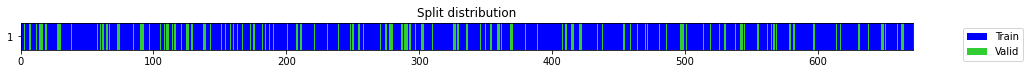

((#538) [313,623,488,207,70,48,398,206,413,9...],
 (#134) [291,638,293,91,415,250,310,3,248,108...])

In [52]:
splits = get_splits(y, valid_size=.2, stratify=True, shuffle=True)
splits

In [53]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
dsets

(#672) [(TSTensor(vars:100, len:150), TensorCategory(0)),(TSTensor(vars:100, len:150), TensorCategory(0)),(TSTensor(vars:100, len:150), TensorCategory(0)),(TSTensor(vars:100, len:150), TensorCategory(0)),(TSTensor(vars:100, len:150), TensorCategory(0)),(TSTensor(vars:100, len:150), TensorCategory(0)),(TSTensor(vars:100, len:150), TensorCategory(0)),(TSTensor(vars:100, len:150), TensorCategory(0)),(TSTensor(vars:100, len:150), TensorCategory(0)),(TSTensor(vars:100, len:150), TensorCategory(0))...]

In [54]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64], batch_tfms=[TSStandardize()], num_workers=0)

In [55]:
dls.c

1

In [56]:
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, metrics=accuracy)

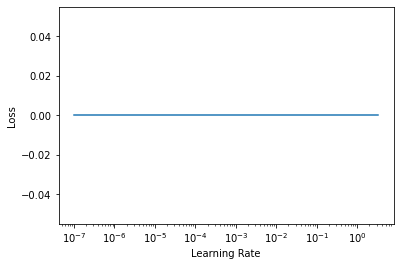

In [57]:
learn.lr_find(suggestions=False)

In [58]:
learn.fit_one_cycle(25, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:00
1,0.000000,0.000000,1.000000,00:00
2,0.000000,0.000000,1.000000,00:00
3,0.000000,0.000000,1.000000,00:00
4,0.000000,0.000000,1.000000,00:00
5,0.000000,0.000000,1.000000,00:00
6,0.000000,0.000000,1.000000,00:00
7,0.000000,0.000000,1.000000,00:00
8,0.000000,0.000000,1.000000,00:00
9,0.000000,0.000000,1.000000,00:00
